# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [1]:
import numpy as np
import pandas as pd
import sqlite3

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [2]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [3]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [4]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [5]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [6]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [7]:
sqlite_query = """
SELECT "Product Name", 
    ROUND(AVG("Policy Value"),2) AS "Policy Value"
    FROM Policy_Table
GROUP BY 1
    ORDER BY 2 DESC;
"""
pd.read_sql(sqlite_query, conn)

,Product Name,Policy Value
0,RETIREMENT ACCOUNT,504964.96
1,FOCUSSED ISA,5746.34
2,CORPORATE MEMBERSHIP,5697.29
3,SIPP,5335.84
4,NHS PENSION,5241.50
5,PRUDENTIAL ISA,5161.14
6,PRUDENTIAL INVESTMENT PLAN,5084.52
7,PRU BOND,4516.39
8,STANDARD ANNUITY,NaN


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [8]:
sqlite_query = """

WITH Q1 AS (
SELECT "Customer ID" AS "Customer ID"
    FROM Policy_Table
    WHERE "Product Category" == "PENSION"
    AND "Policy Start Date" < "2017-01-01"
    )
    
SELECT COUNT(DISTINCT(Q1."Customer ID")) AS "No. of Customers"
    FROM Q1
    JOIN Policy_Table AS Q2
    ON Q1."Customer ID"=Q2."Customer ID"
    WHERE strftime("%Y",Q2."Policy Start Date") = "2017"
    AND CAST(strftime("%m",Q2."Policy Start Date") as int) <=3
    
"""
pd.read_sql(sqlite_query, conn)

,No. of Customers
0,35


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [9]:
sqlite_query = """

WITH Q1 AS (
SELECT DISTINCT("Customer ID") AS "Customer ID",
    "Policy Value"
    FROM Policy_Table
    GROUP BY "Policy Start Date"
    HAVING MIN("Policy Start Date")
    ),

Q2 AS (
SELECT DISTINCT("Customer ID") AS "Customer ID",
    "Policy Value"
    FROM Policy_Table
    GROUP BY "Policy Start Date"
    HAVING MAX("Policy Start Date")
    )

SELECT Q1."Customer ID" AS "Customer ID",
    ABS(COALESCE(CAST(Q1."Policy Value" AS float),0) - COALESCE(CAST(Q2."Policy Value" AS float),0)) AS Variance
    FROM Q1
    LEFT JOIN Q2
    ON Q1."Customer ID"=Q2."Customer ID"
    ORDER BY 2 DESC
    LIMIT 1
    
"""

pd.read_sql(sqlite_query, conn)

,Customer ID,Variance
0,CO867151,992437.0


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [10]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [11]:
import re
## Custom function to varify and map valide email addresses
def emailValidator(x):
    if x is None:
        ret = "NA"
    else:
        if re.search('^\w+[\_\-\.]?\w+[@]\w+[\_\-]?\w+[\.]?\w+[\.]?\w+$',x) and len(x) > 5 :
             ret = "Valid"
        else: ret = "Invalid"
    return ret

In [12]:
#Insert your answer below:

Customer_Table['Email']=Customer_Table['Email'].apply(lambda x : x.strip() if x is not None else None)    ## Removing Trailing Space

Customer_Table['Validation']=Customer_Table['Email'].apply(lambda x : emailValidator(x))                  ## Creating an email validation flag

Invalid_Customers=Customer_Table[Customer_Table["Validation"] == 'Invalid']                                      ## Filtering customers with invalid email address

Invalid_Customers.head(10)

,index,Customer ID,Email,Gender,Age,Postcode,Validation
121,121,CO609712,NOEMAIL,Male,81,None,Invalid
219,219,CO545536,VPEGGSK3@@@SPRINGER.COM,Male,74,46100-000,Invalid
337,337,CO795420,.,Female,68,680011,Invalid
399,399,CO205159,ALOWSELYHF@#AMAZON.CO.JP,Female,65,None,Invalid
422,422,CO627509,TBALLANTINEBU@G.CO,Female,65,None,Invalid
646,646,CO621051,NMINGO5T@G.CO,Male,60,None,Invalid
973,973,CO922481,CUSTOMER TO FOLLOW UP,Male,33,8340,Invalid


In [13]:
## Pulling Policy details for the customers having invalid email address
Invalid_Customers_Policy = pd.merge(Invalid_Customers.drop("index",axis=1),Policy_Table.drop("index",axis=1),how='left',left_on="Customer ID",right_on="Customer ID",validate="1:m")   

## Converting Policy Start Date into date format
Invalid_Customers_Policy["Policy Start Date"]=pd.to_datetime(Invalid_Customers_Policy["Policy Start Date"],format="%Y-%m-%d")
Invalid_Customers_Policy.head(5)

,Customer ID,Email,Gender,Age,Postcode,Validation,Policy Number,Product Category,Product Name,Policy Value,Policy Start Date
0,CO609712,NOEMAIL,Male,81,None,Invalid,RET100027,RETIREMENT,RETIREMENT ACCOUNT,816287.0,2016-08-07
1,CO609712,NOEMAIL,Male,81,None,Invalid,ISA3952,ISA,FOCUSSED ISA,682.0,2014-05-23
2,CO545536,VPEGGSK3@@@SPRINGER.COM,Male,74,46100-000,Invalid,RET100724,RETIREMENT,RETIREMENT ACCOUNT,444111.0,2017-10-03
3,CO545536,VPEGGSK3@@@SPRINGER.COM,Male,74,46100-000,Invalid,ANN1389,ANNUITY,STANDARD ANNUITY,NaN,2013-05-13
4,CO795420,.,Female,68,680011,Invalid,RET100997,RETIREMENT,RETIREMENT ACCOUNT,49384.0,2017-12-11


In [14]:
## Creating policy related stats to identify gaps
Invalid_Customers_Policy_agg = Invalid_Customers_Policy.groupby(["Customer ID","Email","Gender","Age"]).agg({"Policy Value":['sum','mean','min','max'],"Policy Start Date":['min','max'],"Policy Number":'nunique'})
Invalid_Customers_Policy_agg

Policy Value            \
                                                         sum      mean   
Customer ID Email                    Gender Age                          
CO205159    ALOWSELYHF@#AMAZON.CO.JP Female 65      361320.0  180660.0   
CO545536    VPEGGSK3@@@SPRINGER.COM  Male   74      444111.0  444111.0   
CO609712    NOEMAIL                  Male   81      816969.0  408484.5   
CO621051    NMINGO5T@G.CO            Male   60      775961.0  387980.5   
CO627509    TBALLANTINEBU@G.CO       Female 65      282051.0  282051.0   
CO795420    .                        Female 68       49384.0   49384.0   
CO922481    CUSTOMER TO FOLLOW UP    Male   33      284373.0  142186.5   

                                                                     \
                                                      min       max   
Customer ID Email                    Gender Age                       
CO205159    ALOWSELYHF@#AMAZON.CO.JP Female 65     6245.0  355075.0   
CO545536    VPEGGSK3@@@SPRINGER.COM  Male   74   444111.0  444111.0   
CO609712    NOEMAIL                  Male   81      682.0  816287.0   
CO621051    NMINGO5T@G.CO            Male   60     3635.0  772326.0   
CO627509    TBALLANTINEBU@G.CO       Female 65   282051.0  282051.0   
CO795420    .                        Female 68    49384.0   49384.0   
CO922481    CUSTOMER TO FOLLOW UP    Male   33     9788.0  274585.0   

                                                Policy Start Date             \
                                                              min        max   
Customer ID Email                    Gender Age                                
CO205159    ALOWSELYHF@#AMAZON.CO.JP Female 65         2009-11-03 2016-08-13   
CO545536    VPEGGSK3@@@SPRINGER.COM  Male   74         2013-05-13 2017-10-03   
CO609712    NOEMAIL                  Male   81         2014-05-23 2016-08-07   
CO621051    NMINGO5T@G.CO            Male   60         2012-06-27 2016-12-11   
CO627509    TBALLANTINEBU@G.CO       Female 65         2013-07-29 2017-08-22   
CO795420    .                        Female 68         2017-12-11 2017-12-11   
CO922481    CUSTOMER TO FOLLOW UP    Male   33         2011-01-04 2016-11-06   

                                                Policy Number  
                                                      nunique  
Customer ID Email                    Gender Age                
CO205159    ALOWSELYHF@#AMAZON.CO.JP Female 65              2  
CO545536    VPEGGSK3@@@SPRINGER.COM  Male   74              2  
CO609712    NOEMAIL                  Male   81              2  
CO621051    NMINGO5T@G.CO            Male   60              2  
CO627509    TBALLANTINEBU@G.CO       Female 65              2  
CO795420    .                        Female 68              1  
CO922481    CUSTOMER TO FOLLOW UP    Male   33              2

#### It seems that the sales representatives misentered email addresses for these customers

## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


In [15]:
# Insert your answer below: 

## Customer Policies
Customer_Policy = pd.merge(Customer_Table.drop("index",axis=1),Policy_Table.drop("index",axis=1),how='left',on="Customer ID")
Customer_Policy["KEY"] = Customer_Policy['Customer ID'] + "_" + Customer_Policy['Policy Number']

## Customer Fund Snapshots 
Customer_Fund = pd.merge(Customer_Table.drop("index",axis=1),Fund_Table.drop("index",axis=1),how='left',on="Customer ID")
Customer_Fund['KEY'] = Customer_Fund['Customer ID'] + "_" + Customer_Fund['Policy Number']

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

## Function to map desired color with each Policy category
def colorMapper(x):
    if x == "RETIREMENT":
        ret = "aquamarine"
    elif x == "ISA":
        ret = "orange"
    elif x == "PENSION":
        ret = "lightseagreen"
    elif x == "BOND":
        ret = "deeppink"
    elif x == "ANNUITY":
        ret = "orchid"
    else : None
    return ret

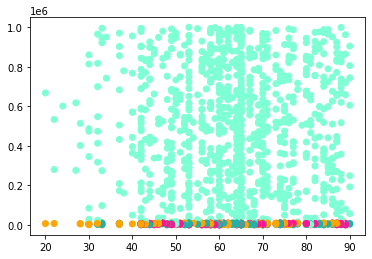

In [17]:
## Creating extra column with colors mapped as per the policy category
Customer_Policy['Color'] = Customer_Policy['Product Category'].apply(lambda x : colorMapper(x))

plt.scatter(x=Customer_Policy['Age'],y=Customer_Policy['Policy Value'],c=Customer_Policy['Color'])

### It's clear from the above image that customers prefer to invest more into Retirement policies.
 

### More over a strong buying pattern for retirement policies is observed in the customers falling under the age between 63 to 67 and also between 51 to 54 

##### We can further integrate these tables with Power BI or Tableau to create and publish more Interactive dashboards and share accross the organization